In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_model, plot_points
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 


# Support Vector Machines (SVM) Kernels

Support Vector Machines (SVM) are a set of supervised learning methods used for classification, regression, and outlier detection. The performance of SVM models is largely influenced by the choice of kernel and its parameters.

## Types of Kernels
In this notebook, we explore three common types of kernels: Linear, Polynomial, and Radial Basis Function (RBF).

- **Linear Kernel**
- **Polynomial Kernel**
- **Radial Basis Function (RBF) Kernel**

We will also discuss key parameters such as `C` and `gamma`.


## Linear Kernel

The linear kernel is the simplest kernel function. 

**Parameters**:
- **`C`**: Regularization parameter that controls the trade-off between achieving a low training error and a low testing error, which is essential for balancing bias and variance in the model.

* A smaller `C` value creates a wider margin by allowing more misclassifications, leading to a simpler model. This can lead to a simpler model that might underfit the data.
    
* A larger `C` value attempts to classify all training examples correctly by creating a narrower margin.  This can lead to a more complex model that might overfit the data.

* `C` in SVMs is a critical parameter that influences the generalization ability of the model.

**Use Case**:
- Suitable for linearly separable data or when the data can be separated with a linear decision boundary in the original feature space.






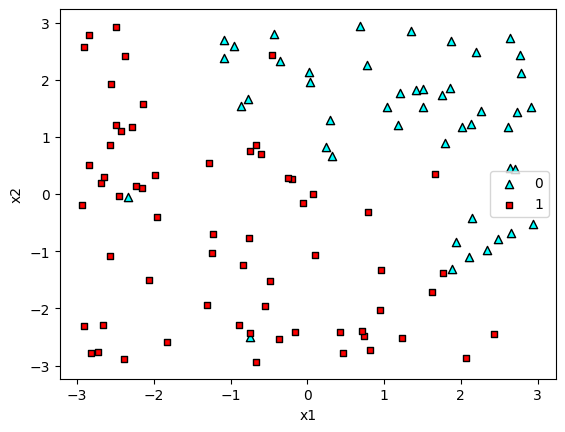

In [2]:
# Generated linear data
linear_data = pd.read_csv('./data/linear.csv')
lin_features = linear_data[['x1', 'x2']]
lin_labels = linear_data['y']
plot_points(lin_features, lin_labels)

Linear Kernel Accuracy (C=0.005): 0.9090909090909091


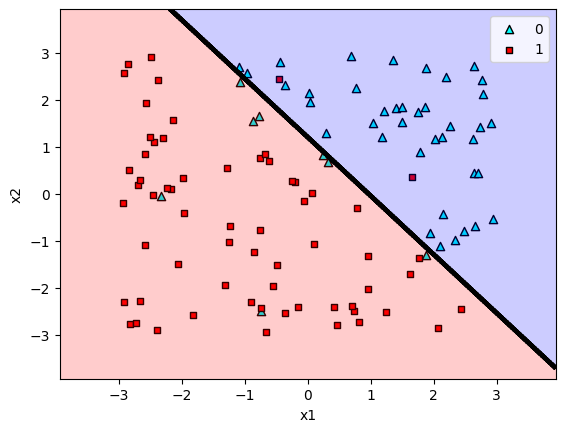

Linear Kernel Accuracy (C=1): 0.9454545454545454


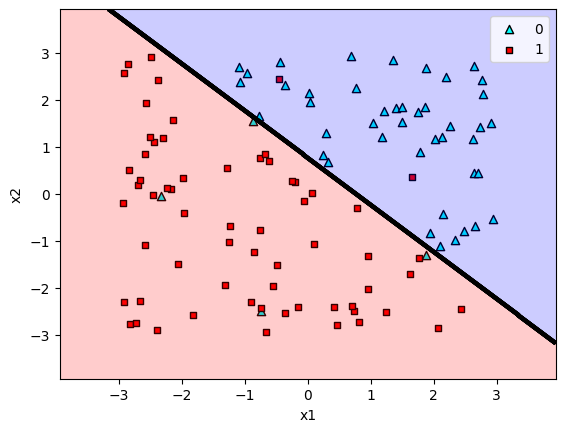

In [3]:
# Linear Kernel with different C values
C_values = [0.005, 1]

for C in C_values:
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(lin_features, lin_labels)
    print(f"Linear Kernel Accuracy (C={C}):", svm_linear.score(lin_features, lin_labels))
    plot_model(lin_features, lin_labels, svm_linear)

# Polynomial Kernel

The polynomial kernel allows for more complex decision boundaries by mapping data into a higher-dimensional space. 

**Parameters**:
- **`C`**: Regularization parameter.
- **`d`**: Degree of the polynomial.
    * Determines the flexibility of the decision boundary.
    * Higher degrees allow for more complex boundaries.
- **`r`**: Coefficient to control the influence of higher-order terms.
    * Adding a bias to the kernel function, which can adjust the model's flexibility.
    
**Use Case**:
- Suitable for problems where the relationship between class labels and attributes is nonlinear.


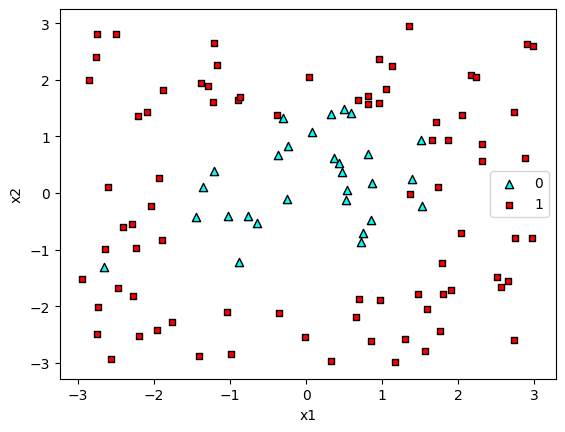

In [4]:
# Generated single circle data
circle_data = pd.read_csv('./data/circle.csv')
cir_features = np.array(circle_data[['x1', 'x2']])
cir_labels = np.array(circle_data['y'])
plot_points(cir_features, cir_labels)

Polynomial Kernel Accuracy (degree=2): 0.9545454545454546


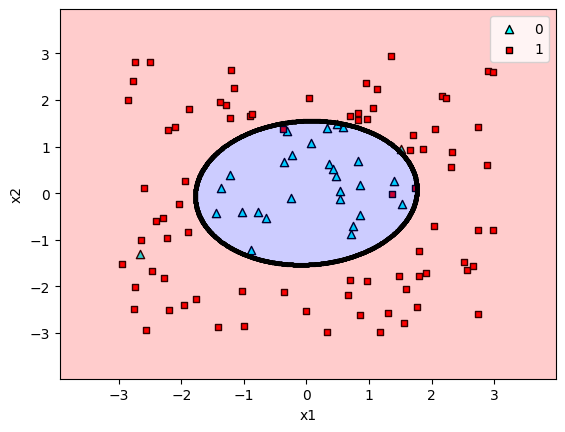

Polynomial Kernel Accuracy (degree=4): 0.9181818181818182


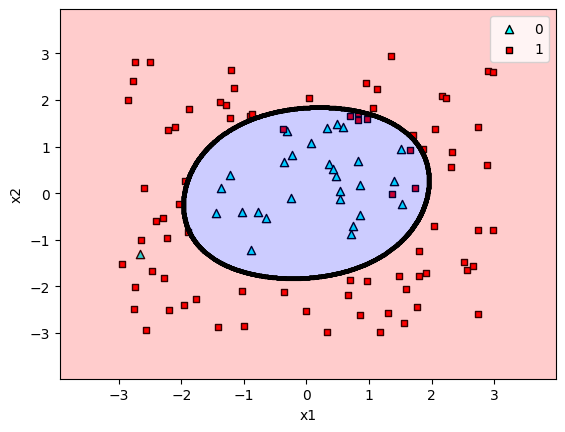

In [5]:
# Polynomial Kernel with different degrees
degrees = [2, 4]

for degree in degrees:
    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(cir_features, cir_labels)
    print(f"Polynomial Kernel Accuracy (degree={degree}):", svm_poly.score(cir_features, cir_labels))
    plot_model(cir_features, cir_labels, svm_poly)

## Radial Basis Function (RBF) Kernel

The RBF kernel, also known as the Gaussian kernel, maps data into an infinite-dimensional space.

**Parameters**:
- **`C`**: Regularization parameter.
- **`gamma`**: Kernel coefficient that defines the influence of a single training example.
    * A small `gamma` value means a large variance (broad decision region), resulting in a smoother decision boundary.
    * A large `gamma` value means a small variance (narrow decision region), which can lead to overfitting.

**Use Case**:
- Suitable for data that is not linearly separable in the original feature space.

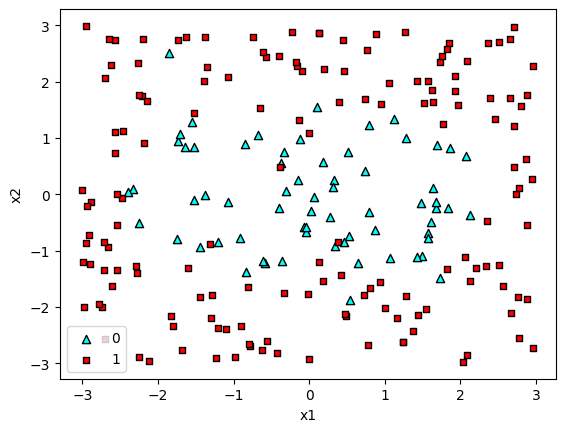

In [6]:
# Generated two circles data
two_circles_data = pd.read_csv('./data/two_circles.csv')
two_cir_features = np.array(two_circles_data[['x1', 'x2']])
two_cir_labels = np.array(two_circles_data['y'])
plot_points(two_cir_features, two_cir_labels)

RBF Kernel Accuracy (gamma=0.1): 0.9227272727272727


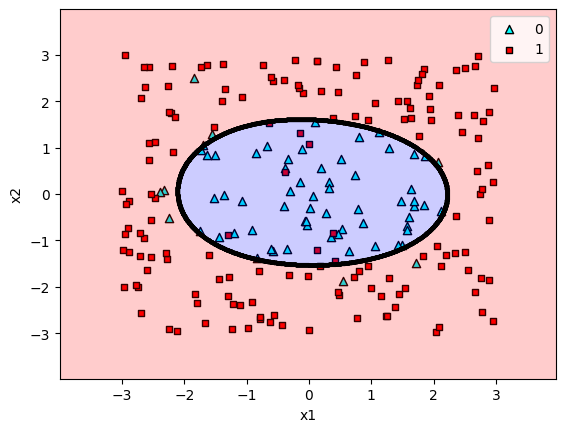

RBF Kernel Accuracy (gamma=1): 0.95


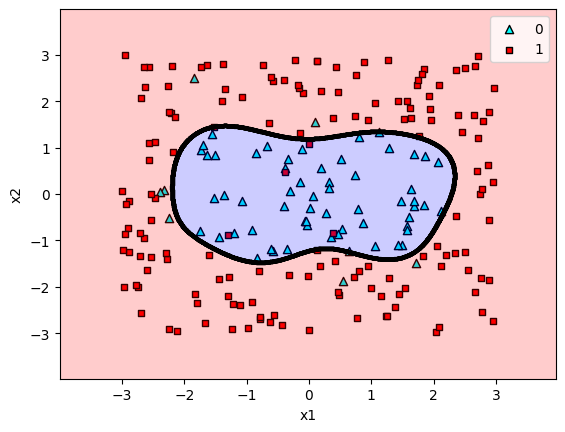

RBF Kernel Accuracy (gamma=10): 0.9636363636363636


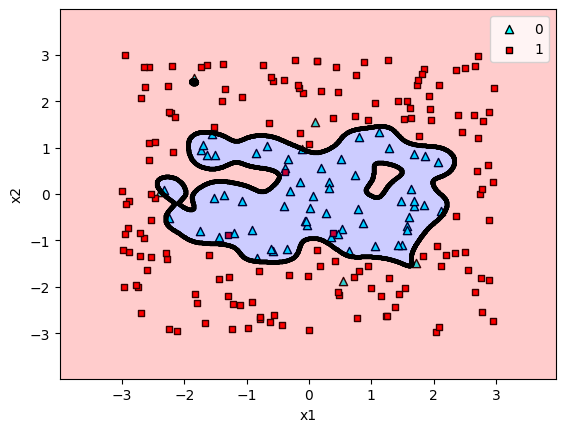

RBF Kernel Accuracy (gamma=100): 0.9954545454545455


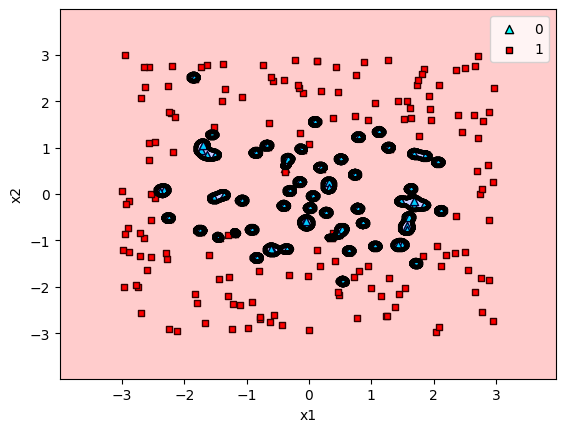

In [7]:
# RBF Kernel with different gamma values
gammas = [0.1, 1, 10, 100]

for gamma in gammas:
    svm_rbf = SVC(kernel='rbf', gamma=gamma)
    svm_rbf.fit(two_cir_features, two_cir_labels)
    print(f"RBF Kernel Accuracy (gamma={gamma}):", svm_rbf.score(two_cir_features, two_cir_labels))
    plot_model(two_cir_features, two_cir_labels, svm_rbf)